<a href="https://colab.research.google.com/github/Jokoisme/penguins-classification/blob/main/notebooks/02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change to processed data
outputPath = "https://raw.githubusercontent.com/Jokoisme/penguins-classification/main/data/processed/penguins_processed.csv"
data = pd.read_csv(outputPath)

In [3]:
# Basic statistics
print(data.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000


FileNotFoundError: [Errno 2] No such file or directory: 'results/figures/correlation.png'

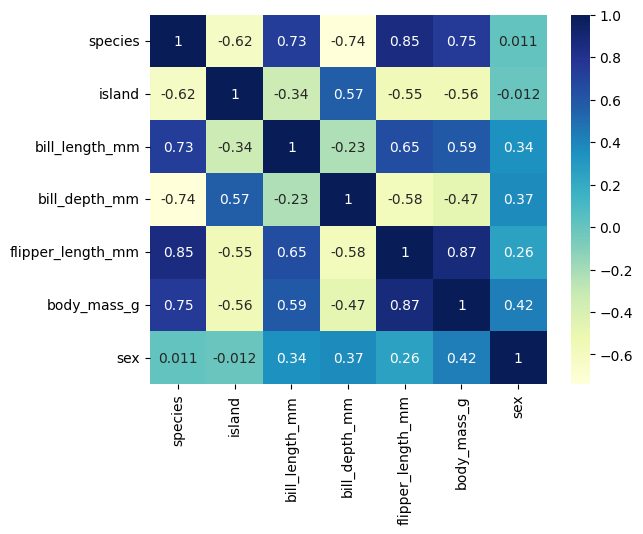

In [4]:
# Correlation

# Change String data values to categorical
data['species'] = data['species'].astype('category').cat.codes
data['island'] = data['island'].astype('category').cat.codes
data['sex'] = data['sex'].astype('category').cat.codes

dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

figPath = "results/figures/correlation.png"
plt.savefig(figPath)

print("EDA completed. Correlation plot saved to results/figures/correlation.png")